In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
# Step 1: Load the dataset
df = pd.read_excel("/content/Global_Superstore2.xlsx")

In [3]:
# Step 2: Explore the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0  

In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    

In [5]:
# Check for duplicates
print("Checking for duplicates...")
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Checking for duplicates...
Number of duplicate rows: 0


In [6]:
# Step 2: Check for data types
print("\nChecking data types:")
print(df.dtypes)


Checking data types:
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


In [7]:
# Step 3: Check for missing values
print("\nChecking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)


Checking for missing values:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [8]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [9]:
# Step 4: Feature Engineering and Statistical Analysis
# 4.1 Create new features using NumPy
df["Log_Sales"] = np.log1p(df["Sales"])  # Log-transformed sales
df["Profit_Margin"] = df["Profit"] / df["Sales"]  # Profit margin

In [10]:
# Descriptive statistics for numeric columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
            Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost     Log_Sales  Profit_Margin  
count  51290.000000   51290.000000  51290.000000   51290.000000  
mean      28.610982      26.375915      4.511842       0.047430  
std      174.340972      57.296804      1.423866       0.465667  
min    -

In [11]:
# Correlation Analysis
correlation_matrix = df[["Sales", "Profit", "Quantity", "Discount", "Profit_Margin"]].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Sales    Profit  Quantity  Discount  Profit_Margin
Sales          1.000000  0.484918  0.313577 -0.086722       0.074525
Profit         0.484918  1.000000  0.104365 -0.316490       0.358106
Quantity       0.313577  0.104365  1.000000 -0.019875       0.050143
Discount      -0.086722 -0.316490 -0.019875  1.000000      -0.847358
Profit_Margin  0.074525  0.358106  0.050143 -0.847358       1.000000


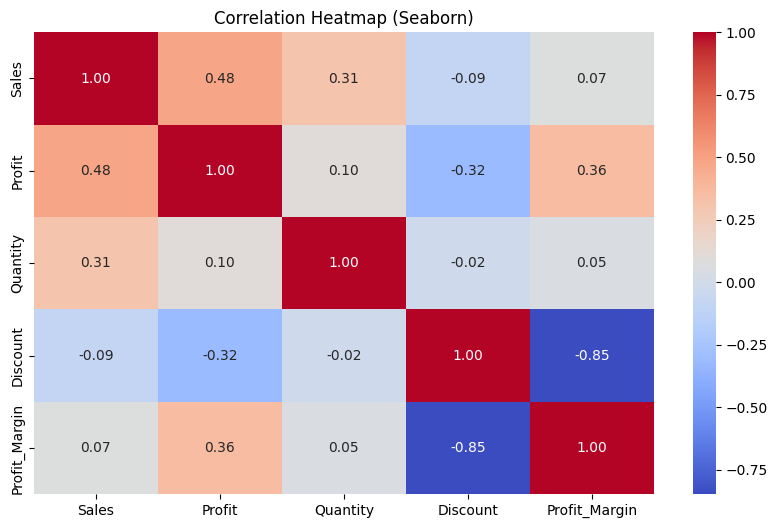

In [12]:
# Visualization 1: Heatmap of Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Seaborn)")
plt.show()

<ipython-input-13-f6d3a54e765b>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Order Date"] = pd.to_datetime(df["Order Date"])
<ipython-input-13-f6d3a54e765b>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="M"))["Sales"].sum()


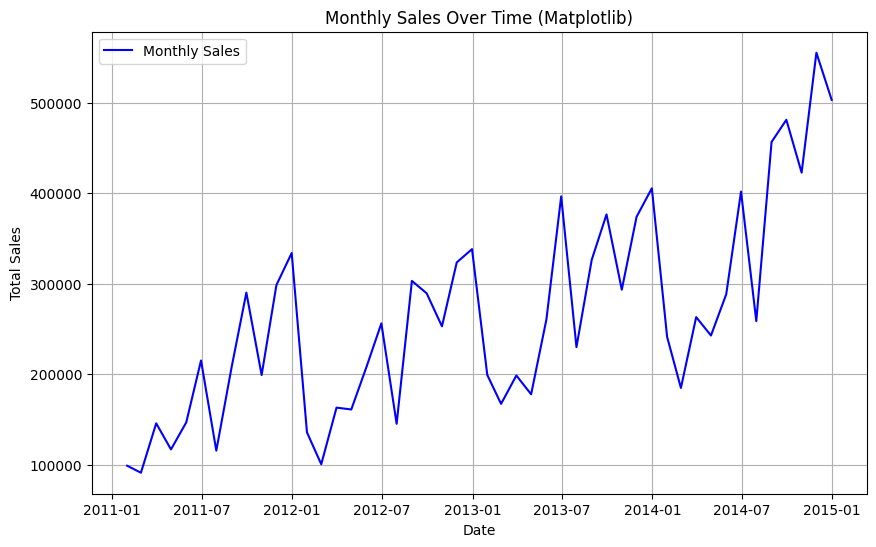

In [13]:
# Visualization 2: Line Plot of Monthly Sales
if "Order Date" in df.columns:
    df["Order Date"] = pd.to_datetime(df["Order Date"])
    monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="M"))["Sales"].sum()
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales.index, monthly_sales.values, color="blue", label="Monthly Sales")
    plt.title("Monthly Sales Over Time (Matplotlib)")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.legend()
    plt.grid()
    plt.show()

<ipython-input-14-f9ec2bdc565f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="Profit_Margin", palette="Set2")


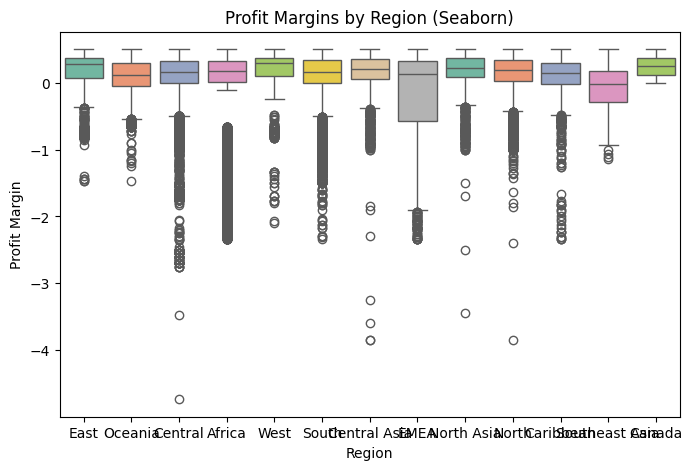

In [14]:
# Visualization 3: Boxplot of Profit Margins by Region
if "Region" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Region", y="Profit_Margin", palette="Set2")
    plt.title("Profit Margins by Region (Seaborn)")
    plt.xlabel("Region")
    plt.ylabel("Profit Margin")
    plt.show()

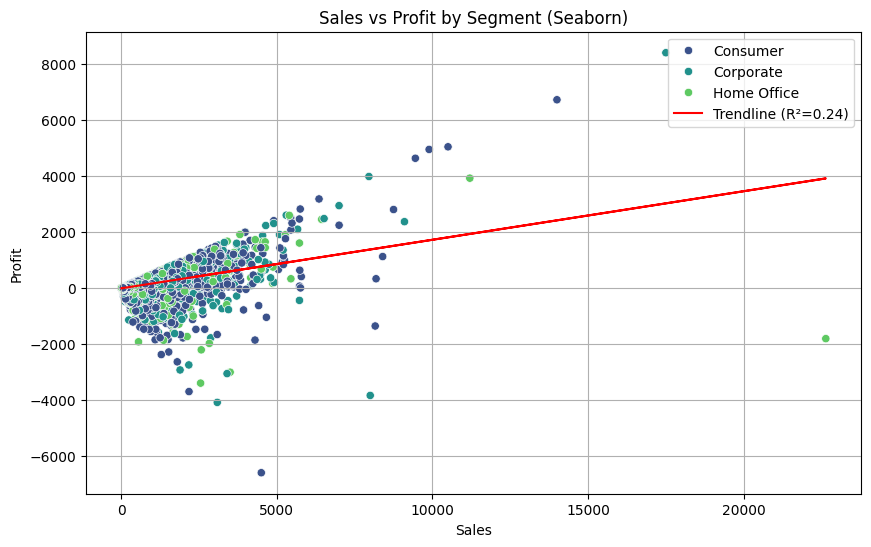

In [15]:
# Visualization 4: Scatter Plot of Sales vs Profit (with trendline)
if "Sales" in df.columns and "Profit" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Sales", y="Profit", hue="Segment", palette="viridis")
    # Add trendline
    slope, intercept, r_value, _, _ = linregress(df["Sales"], df["Profit"])
    plt.plot(df["Sales"], slope * df["Sales"] + intercept, color="red", label=f"Trendline (R²={r_value**2:.2f})")
    plt.title("Sales vs Profit by Segment (Seaborn)")
    plt.xlabel("Sales")
    plt.ylabel("Profit")
    plt.legend()
    plt.grid()
    plt.show()

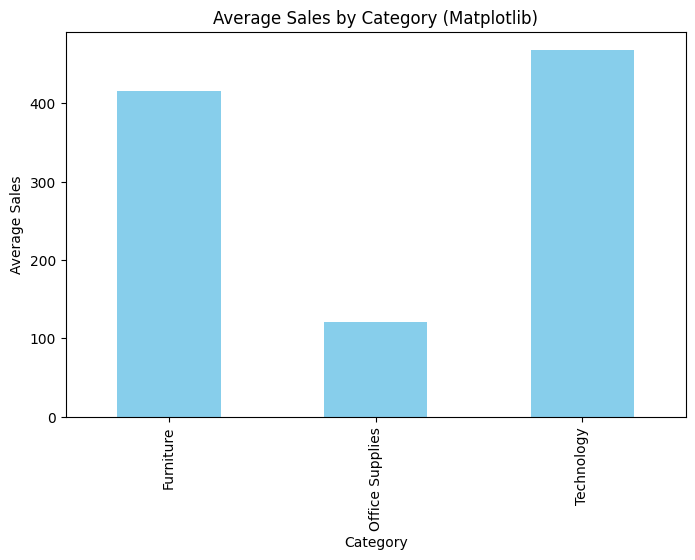

In [16]:
# Visualization 5: Bar Chart of Average Sales by Category
if "Category" in df.columns:
    avg_sales_by_category = df.groupby("Category")["Sales"].mean()
    plt.figure(figsize=(8, 5))
    avg_sales_by_category.plot(kind="bar", color="skyblue")
    plt.title("Average Sales by Category (Matplotlib)")
    plt.xlabel("Category")
    plt.ylabel("Average Sales")
    plt.show()

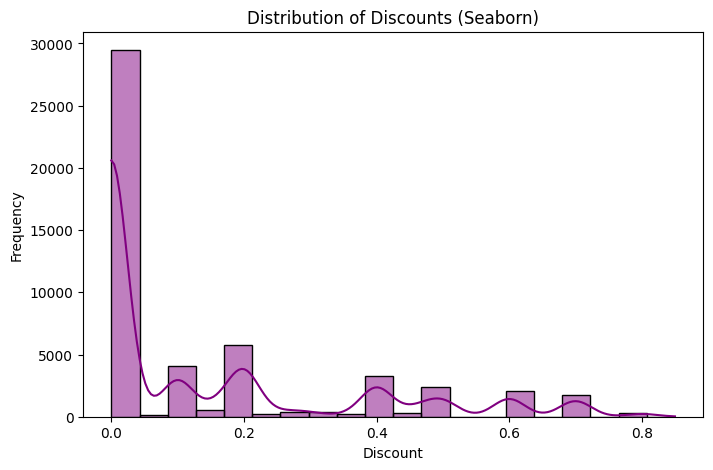

In [17]:
# Visualization 6: Histogram of Discount Distribution
if "Discount" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df["Discount"], kde=True, bins=20, color="purple")
    plt.title("Distribution of Discounts (Seaborn)")
    plt.xlabel("Discount")
    plt.ylabel("Frequency")
    plt.show()

<ipython-input-18-efcc25f953bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Segment", y="Sales", palette="muted")


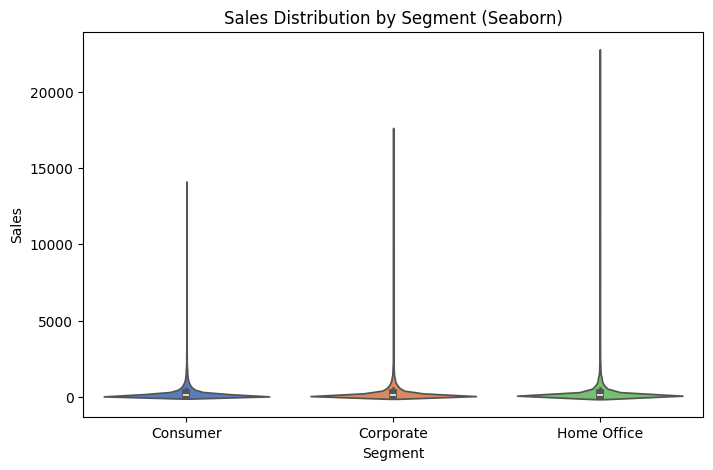

In [18]:
# Visualization 7: Violin Plot of Sales by Segment
if "Segment" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, x="Segment", y="Sales", palette="muted")
    plt.title("Sales Distribution by Segment (Seaborn)")
    plt.xlabel("Segment")
    plt.ylabel("Sales")
    plt.show()

In [19]:
# Analyze the effect of discounts on profits
discount_bins = pd.cut(df["Discount"], bins=[0, 0.1, 0.2, 0.3, 0.4, 1.0], labels=["0-10%", "10-20%", "20-30%", "30-40%", "40%+"])
avg_profit_by_discount = df.groupby(discount_bins)["Profit"].mean()
print("\nAverage Profit by Discount Range:")
print(avg_profit_by_discount)


Average Profit by Discount Range:
Discount
0-10%     72.278107
10-20%    27.614734
20-30%   -21.877573
30-40%   -48.857485
40%+     -90.132312
Name: Profit, dtype: float64


<ipython-input-19-90321dd560a2>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_profit_by_discount = df.groupby(discount_bins)["Profit"].mean()


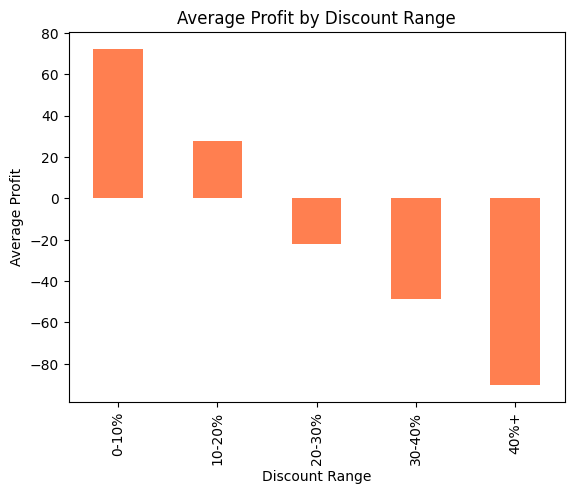

In [20]:
# Bar chart for the above analysis
avg_profit_by_discount.plot(kind="bar", color="coral", title="Average Profit by Discount Range")
plt.xlabel("Discount Range")
plt.ylabel("Average Profit")
plt.show()